# K-means (K-medias)

### Clusterización

- Vamos a usar un contexto de segmentación de clientes bancarios.
- Digamos que un banco desea conocer si sus clientes se agrupan de forma natural utilizando dos caracteristicas.
> 1. Saldo en cuenta de ahorros
>
> 2. Veces que los clientes han usado la tarjeta de crédito en el último trimestre.

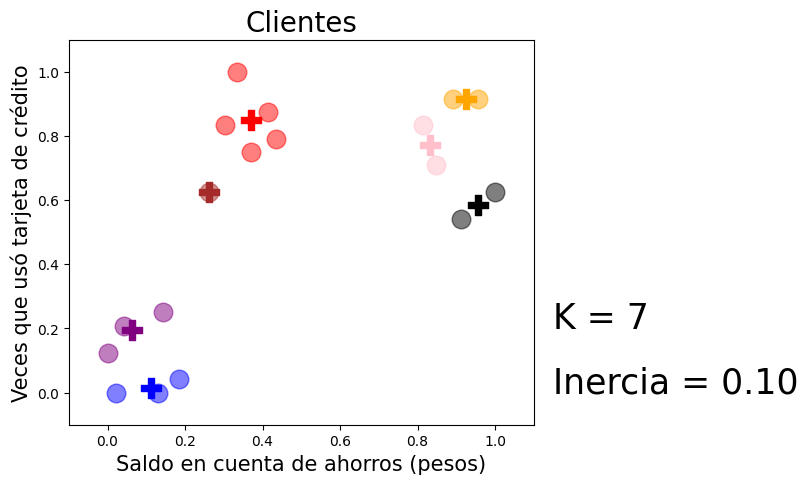

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

clientes = pd.DataFrame({"saldo" : [50000, 45000, 48000, 43500, 47000, 52000, 
                                    20000, 26000, 25000, 23000, 21400, 18000,
                                    8000, 12000, 6000, 14500, 12600, 7000],
                         
                         "transacciones": [25, 20, 16, 23, 25, 18,
                                           23, 22, 24, 21, 27, 18,
                                           8, 3, 6, 4, 9, 3]})

escalador = MinMaxScaler().fit(clientes.values)

clientes = pd.DataFrame(escalador.transform(clientes.values),
                       columns=["saldo", "transacciones"])

kmeans = KMeans(n_clusters=7).fit(clientes.values)

clientes["cluster"] = kmeans.labels_

# Instrucciones para graficar los clusters 

plt.figure(figsize=(6, 5), dpi=100)

colores = ["red", "blue", "orange", "black", "purple", "pink", "brown"]

for cluster in range(kmeans.n_clusters):
    plt.scatter(clientes[clientes["cluster"] == cluster]["saldo"],
                clientes[clientes["cluster"] == cluster]["transacciones"],
                marker="o", s=180, color=colores[cluster], alpha=0.5)
    
    plt.scatter(kmeans.cluster_centers_[cluster][0], 
                kmeans.cluster_centers_[cluster][1], 
                marker="P", s=200, color=colores[cluster])

plt.title("Clientes", fontsize=20)
plt.xlabel("Saldo en cuenta de ahorros (pesos)", fontsize=15)
plt.ylabel("Veces que usó tarjeta de crédito", fontsize=15)
plt.text(1.15, 0.2, "K = %i" % kmeans.n_clusters, fontsize=25)
plt.text(1.15, 0, "Inercia = %0.2f" % kmeans.inertia_, fontsize=25)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)    
plt.show()

del clientes["cluster"] 

# Método del Codo

### Calculando el Número del cluster K

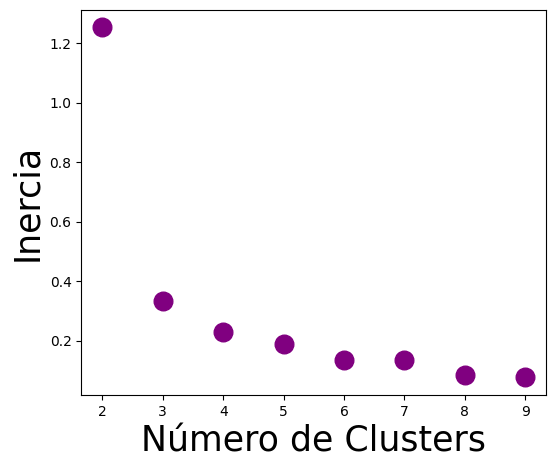

In [23]:
inercias = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(clientes.values)
    inercias.append(kmeans.inertia_)
    
plt.figure(figsize=(6, 5), dpi=100)
plt.scatter(range(2, 10), inercias, marker="o", s=180, color="purple")
plt.xlabel("Número de Clusters", fontsize=25)
plt.ylabel("Inercia", fontsize=25)
plt.show()